# ByteHaven: Post-Pandemic Performance Analysis
**Project Goal:** Analyze sales, product, customer, and channel performance using transactional data from 2019–2022.  
**Tools Used:** Python (Pandas, Matplotlib, Seaborn), MySQL, MS Excel  
**Deliverable:** Strategic insights and business recommendations for marketing, operations, and product teams.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For better chart display
sns.set(style='whitegrid')
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [250]:
# Load orders and geo lookup datasets
orders = pd.read_csv(r'C:\Users\anime\OneDrive\Documents\BytheHaven pyp\Orders_full.csv', parse_dates=[
    'purchase_ts', 'created_on', 'ship_ts', 'delivery_ts', 'refund_ts'
])
geo = pd.read_csv(r'C:\Users\anime\OneDrive\Documents\BytheHaven pyp\geo_lookup.csv')

# Preview
orders.head()


,order_id,customer_id,country_code,created_on,loyalty_program,account_creation_method,marketing_channel,product_id,product_name,usd_price,local_price,currency,purchase_platform,purchase_ts,ship_ts,delivery_ts,refund_ts
0,29ebba8dbfd1699,64957690,GB,2018-11-12,0,desktop,direct,ab0f,Samsung Charging Cable Pack,24.9,20,GBP,website,2019-01-01,2019-01-04,2019-01-08,NaT
1,4824555950b3552,00f0fb3c,BR,2016-08-09,0,desktop,direct,54ed,Macbook Air Laptop,1800.0,1800,USD,website,2019-01-01,2019-01-03,2019-01-09,NaT
2,e122c8f5ad44060,02157f8f,IT,2011-04-08,0,desktop,direct,8d0d,Apple Airpods Headphones,175.1,138,GBP,website,2019-01-01,2019-01-02,2019-01-08,2021-01-13
3,8f87a6e55256312,07ed3579,US,2018-12-21,0,desktop,direct,ab0f,Samsung Charging Cable Pack,24.0,24,USD,website,2019-01-01,2019-01-03,2019-01-07,2021-02-01
4,8f87a6e55256313,07ed3579,US,2018-12-21,0,desktop,direct,ab0f,Samsung Charging Cable Pack,24.0,24,USD,website,2019-01-01,2019-01-03,2019-01-07,2021-02-01


## Step 1: Data Overview & Cleaning
 Inspecting the dataset and checking for:
- Missing values
- Duplicates
- Correct data types


In [12]:
orders.info()
orders.describe(include='all')
orders.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108094 entries, 0 to 108093
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order_id                 108094 non-null  object        
 1   customer_id              108094 non-null  object        
 2   country_code             107944 non-null  object        
 3   created_on               108094 non-null  datetime64[ns]
 4   loyalty_program          108094 non-null  int64         
 5   account_creation_method  106688 non-null  object        
 6   marketing_channel        106709 non-null  object        
 7   product_id               108094 non-null  object        
 8   product_name             108094 non-null  object        
 9   usd_price                108094 non-null  float64       
 10  local_price              108094 non-null  int64         
 11  currency                 108040 non-null  object        
 12  purchase_platfor

order_id                        0
customer_id                     0
country_code                  150
created_on                      0
loyalty_program                 0
account_creation_method      1406
marketing_channel            1385
product_id                      0
product_name                    0
usd_price                       0
local_price                     0
currency                       54
purchase_platform               0
purchase_ts                     3
ship_ts                        30
delivery_ts                    30
refund_ts                  102704
dtype: int64

In [14]:
orders['year_month'] = orders['purchase_ts'].dt.to_period('M')

#  Monthly Revenue & Order Trends

###  Objective:
To analyze ByteHaven’s sales performance over time by tracking total revenue, order volume, and average order value (AOV) on a monthly basis. This helps identify growth trends, seasonal patterns, and performance fluctuations.

###  Key Metrics:
- **Total Revenue**: Sum of USD sales per month
- **Order Count**: Number of orders placed each month
- **Average Order Value (AOV)**: Revenue per order

###  Business Questions:
- Are there any **seasonal spikes** in sales?
- Is ByteHaven’s revenue **growing or declining**?
- How do **order volume and AOV** influence overall revenue?


In [17]:
orders_clean = orders.dropna(subset=['purchase_ts'])

In [21]:
monthly_summary = orders_clean.groupby('year_month').agg(
    total_revenue=('usd_price', 'sum'),
    order_count=('order_id', 'count'),
    avg_order_value=('usd_price', 'mean')
).reset_index()

In [23]:
monthly_summary['year_month'] = monthly_summary['year_month'].dt.to_timestamp()

In [25]:
print(monthly_summary.head())

  year_month  total_revenue  order_count  avg_order_value
0 2019-01-01      362082.52         1666           217.34
1 2019-02-01      246838.73         1125           219.41
2 2019-03-01      274942.64         1257           218.73
3 2019-04-01      271675.02         1232           220.52
4 2019-05-01      277336.63         1182           234.63


In [27]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

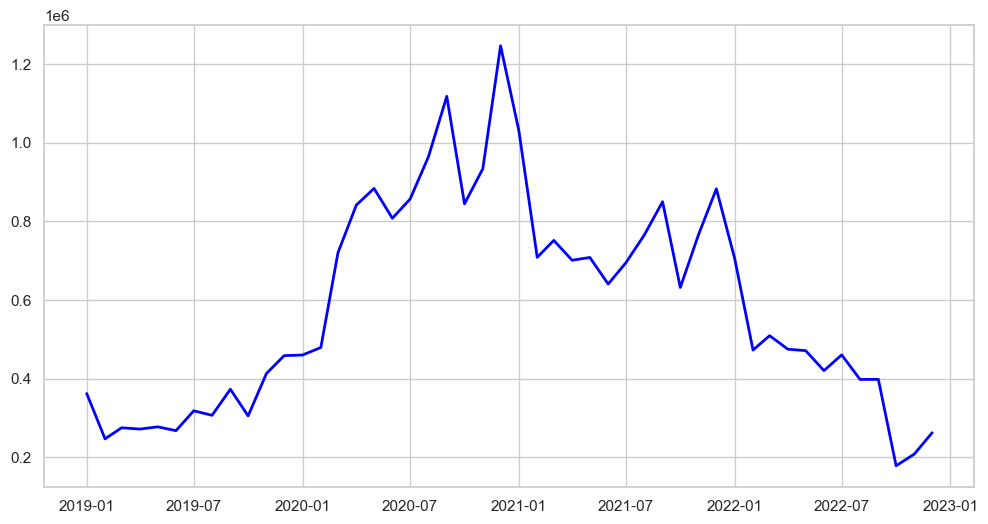

In [29]:
plt.plot(monthly_summary['year_month'], monthly_summary['total_revenue'], label='Total Revenue (USD)', color='blue', linewidth=2)

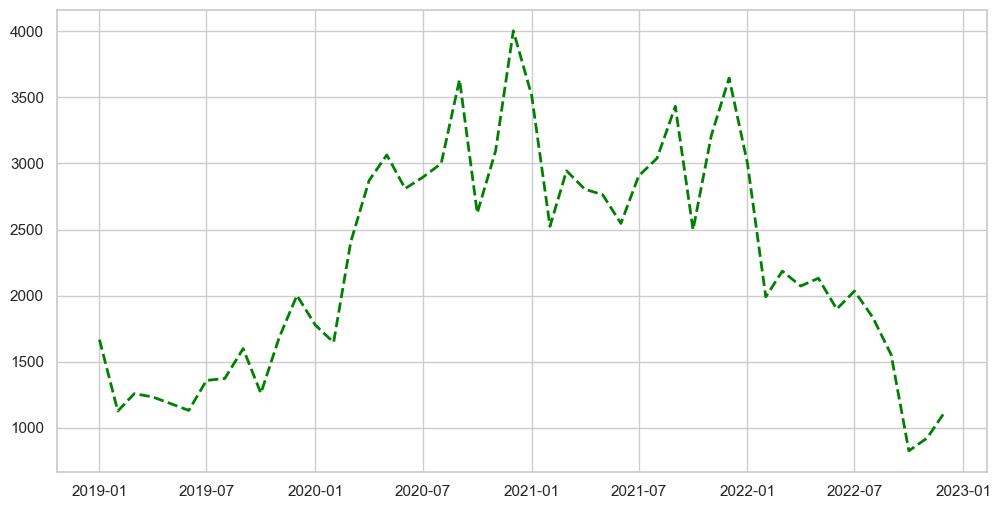

In [31]:
plt.plot(monthly_summary['year_month'], monthly_summary['order_count'], label='Order Count', color='green', linestyle='--', linewidth=2)


In [ ]:
plt.title('Monthly Revenue and Order Count')
plt.xlabel('Month')
plt.ylabel('USD / Orders')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
import pandas as pd

In [18]:
orders = pd.read_csv(r'C:\Users\anime\OneDrive\Documents\BytheHaven pyp\Orders_full.csv', parse_dates=[
    'purchase_ts', 'created_on', 'ship_ts', 'delivery_ts', 'refund_ts'
])
orders

,order_id,customer_id,country_code,created_on,loyalty_program,account_creation_method,marketing_channel,product_id,product_name,usd_price,local_price,currency,purchase_platform,purchase_ts,ship_ts,delivery_ts,refund_ts
0,29ebba8dbfd1699,64957690,GB,2018-11-12,0,desktop,direct,ab0f,Samsung Charging Cable Pack,24.90,20,GBP,website,2019-01-01,2019-01-04,2019-01-08,NaT
1,4824555950b3552,00f0fb3c,BR,2016-08-09,0,desktop,direct,54ed,Macbook Air Laptop,1800.00,1800,USD,website,2019-01-01,2019-01-03,2019-01-09,NaT
2,e122c8f5ad44060,02157f8f,IT,2011-04-08,0,desktop,direct,8d0d,Apple Airpods Headphones,175.10,138,GBP,website,2019-01-01,2019-01-02,2019-01-08,2021-01-13
3,8f87a6e55256312,07ed3579,US,2018-12-21,0,desktop,direct,ab0f,Samsung Charging Cable Pack,24.00,24,USD,website,2019-01-01,2019-01-03,2019-01-07,2021-02-01
4,8f87a6e55256313,07ed3579,US,2018-12-21,0,desktop,direct,ab0f,Samsung Charging Cable Pack,24.00,24,USD,website,2019-01-01,2019-01-03,2019-01-07,2021-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108089,aadfad7010355213,816896c4,US,2013-05-03,0,desktop,direct,8d0d,Apple Airpods Headphones,168.00,168,USD,website,2022-07-26,2022-07-28,2022-08-03,NaT
108090,a623acaa3b91893,71780568,AE,2021-11-28,1,mobile,email,f81e,Samsung Webcam,49.79,183,AED,mobile app,2022-08-11,2022-08-12,2022-08-16,NaT
108091,1e0aacc14e21331,50684040,US,2022-02-19,0,NaN,NaN,8d0d,Apple Airpods Headphones,168.00,168,USD,website,2022-09-11,2022-09-13,2022-09-16,NaT
108092,8bd5e8b6ec6101362,efea4743,US,2022-08-02,0,desktop,direct,4c58,Samsung Charging Cable Pack,13.98,14,USD,mobile app,2022-09-22,2022-09-25,2022-09-28,NaT


In [20]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108094 entries, 0 to 108093
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order_id                 108094 non-null  object        
 1   customer_id              108094 non-null  object        
 2   country_code             107944 non-null  object        
 3   created_on               108094 non-null  datetime64[ns]
 4   loyalty_program          108094 non-null  int64         
 5   account_creation_method  106688 non-null  object        
 6   marketing_channel        106709 non-null  object        
 7   product_id               108094 non-null  object        
 8   product_name             108094 non-null  object        
 9   usd_price                108094 non-null  float64       
 10  local_price              108094 non-null  int64         
 11  currency                 108040 non-null  object        
 12  purchase_platfor

In [22]:
#  Drop rows with missing purchase timestamp
orders_clean = orders.dropna(subset=['purchase_ts'])

In [26]:
#  Group by purchase month and aggregate metrics
monthly_summary = orders_clean.groupby(
    orders_clean['purchase_ts'].dt.to_period('M').rename('purchase_month')
).agg(
    total_sales=('usd_price', 'sum'),
    avg_sales=('usd_price', 'mean'),
    total_orders=('order_id', 'count')
)

In [28]:
#  Calculate growth rates (%)
monthly_summary['sales_growth_rate'] = monthly_summary['total_sales'].pct_change() * 100
monthly_summary['aov_growth_rate'] = monthly_summary['avg_sales'].pct_change() * 100
monthly_summary['order_growth_rate'] = monthly_summary['total_orders'].pct_change() * 100


In [30]:
#  Clean: Fill NaNs, round values, format for display
monthly_summary = monthly_summary.fillna(0)
monthly_summary[['total_sales', 'avg_sales']] = monthly_summary[['total_sales', 'avg_sales']].round(2)
monthly_summary[['sales_growth_rate', 'aov_growth_rate', 'order_growth_rate']] = monthly_summary[['sales_growth_rate', 'aov_growth_rate', 'order_growth_rate']].round(1)

In [34]:
#  Styled Pandas table with gradient
styled_summary = monthly_summary.style.format("{:,.2f}").background_gradient(
    subset=['sales_growth_rate', 'aov_growth_rate', 'order_growth_rate'],
    cmap="RdYlGn",
    vmin=-100,
    vmax=100
    )

styled_summary

,total_sales,avg_sales,total_orders,sales_growth_rate,aov_growth_rate,order_growth_rate
purchase_month,,,,,,
2019-01,"362,082.52",217.34,"1,666.00",0.00,0.00,0.00
2019-02,"246,838.73",219.41,"1,125.00",-31.80,1.00,-32.50
2019-03,"274,942.64",218.73,"1,257.00",11.40,-0.30,11.70
2019-04,"271,675.02",220.52,"1,232.00",-1.20,0.80,-2.00
2019-05,"277,336.63",234.63,"1,182.00",2.10,6.40,-4.10
2019-06,"267,625.71",236.84,"1,130.00",-3.50,0.90,-4.40
2019-07,"318,074.23",234.40,"1,357.00",18.90,-1.00,20.10
2019-08,"306,656.99",223.51,"1,372.00",-3.60,-4.60,1.10
2019-09,"372,892.78",233.35,"1,598.00",21.60,4.40,16.50


# Monthly Metrics and Growth Rates by Year

###  Objective:
To track and visualize how ByteHaven's total sales, order volume, and average order value (AOV) have evolved month by month and year over year. This view helps identify seasonality, marketing effectiveness, and product performance shifts.

###  Charts Included:
- **Line charts** for:
  - Total Sales by Month
  - AOV by Month
  - Total Orders by Month
- **Heatmaps** for:
  - Month-over-Month Sales Growth Rate (%)
  - AOV Growth Rate (%)
  - Order Growth Rate (%)

###  Visualization Notes:
- Each line represents a year (4-color palette)
- Growth heatmaps are color-scaled using blues: light (low), dark (high)


In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
orders = pd.read_csv(r'C:\Users\anime\OneDrive\Documents\BytheHaven pyp\Orders_full.csv', parse_dates=[
    'purchase_ts', 'created_on', 'ship_ts', 'delivery_ts', 'refund_ts'
])

In [156]:
#  Preparing Time Columns
orders_clean = orders.dropna(subset=['purchase_ts']).copy()
orders_clean['year'] = orders_clean['purchase_ts'].dt.year
orders_clean['month'] = orders_clean['purchase_ts'].dt.strftime('%b')
orders_clean['month_num'] = orders_clean['purchase_ts'].dt.month

In [158]:
#  Grouping Monthly Metrics
monthly_grouped = orders_clean.groupby(['year', 'month', 'month_num']).agg(
    total_sales=('usd_price', 'sum'),
    avg_order_value=('usd_price', 'mean'),
    total_orders=('order_id', 'count')
).reset_index()

In [160]:
#  Pivot Tables (with automatic month labels)
sales_pivot = monthly_grouped.pivot(index='year', columns='month_num', values='total_sales').dropna(axis=1, how='all')
aov_pivot = monthly_grouped.pivot(index='year', columns='month_num', values='avg_order_value').dropna(axis=1, how='all')
orders_pivot = monthly_grouped.pivot(index='year', columns='month_num', values='total_orders').dropna(axis=1, how='all')

In [162]:
#  Calculating month-over-month growth (%)
sales_growth = sales_pivot.pct_change(axis=1) * 100
aov_growth = aov_pivot.pct_change(axis=1) * 100
orders_growth = orders_pivot.pct_change(axis=1) * 100

In [205]:
#  Month Labels
# Use existing column names directly
month_labels = sales_pivot.columns.tolist()



In [225]:
print("Month Labels:", month_labels)
print("Sales Data Sample:")
print(sales_pivot.head())


Month Labels: ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Sales Data Sample:
             Jan        Feb        Mar        Apr        May        Jun  \
year                                                                      
2019   362082.52  246838.73  274942.64  271675.02  277336.63  267625.71   
2020   459841.13  479024.47  720057.89  841114.01  883406.02  807578.84   
2021  1029590.56  708242.32  751315.12  700846.59  707922.02  640375.83   
2022   704987.29  472508.05  509139.72  474613.47  471052.23  420233.98   

            Jul        Aug         Sep        Oct        Nov         Dec  
year                                                                      
2019  318074.23  306656.99   372892.78  305155.45  412987.70   458353.55  
2020  856502.44  963879.03  1117517.91  844247.63  933548.75  1246006.87  
2021  694568.52  764837.53   849596.99  631597.86  766631.12   882369.98  
2022  460292.20  397805.61   397961.04  178274.91  20836

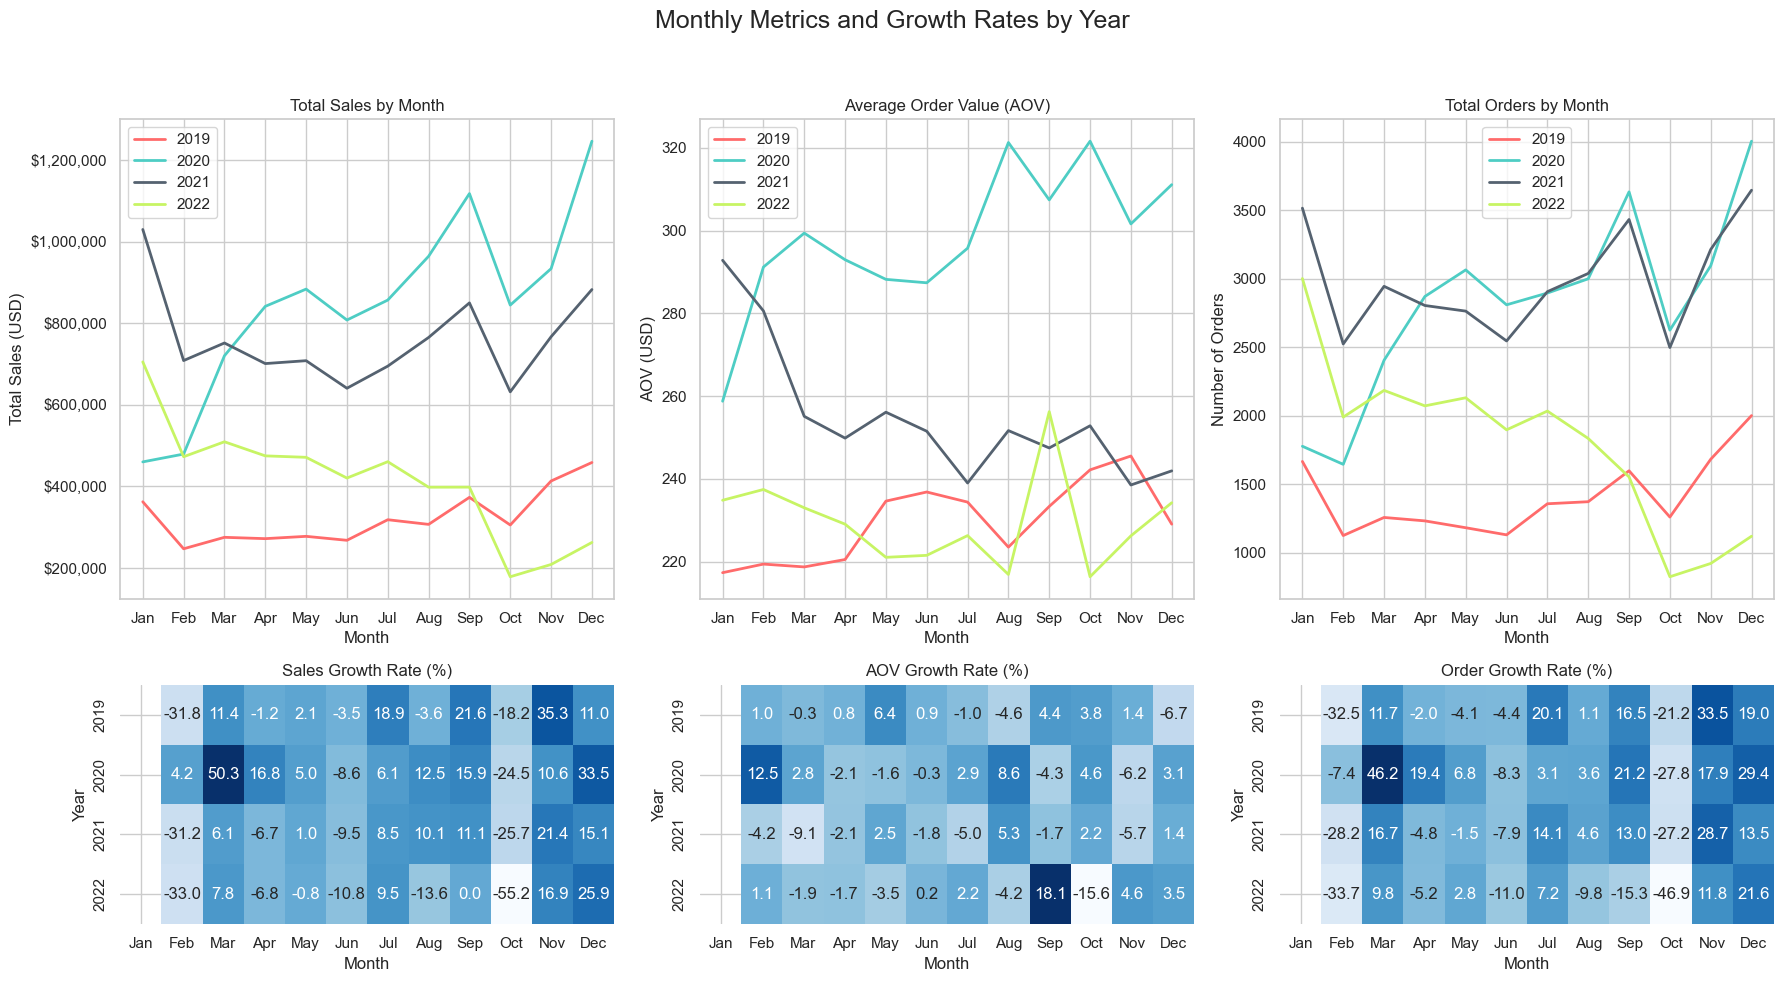

In [246]:
#  Set style and custom color palette
sns.set_theme(style="whitegrid")
colors = ['#FF6B6B', '#4ECDC4', '#556270', '#C7F464']  # 4 contrasting colors

fig, axes = plt.subplots(2, 3, figsize=(18, 10), gridspec_kw={'height_ratios': [2, 1]})
fig.suptitle("Monthly Metrics and Growth Rates by Year", fontsize=18)


# Line Plot 1: Total Sales
for i, year in enumerate(sales_pivot.index):
    axes[0, 0].plot(month_labels, sales_pivot.loc[year].values, label=year, color=colors[i % len(colors)], linewidth=2)
    
#Line Plot 2: AOV
for i, year in enumerate(aov_pivot.index):
    axes[0, 1].plot(month_labels, aov_pivot.loc[year].values, label=year, color=colors[i % len(colors)], linewidth=2)

# Line Plot 3: Total Orders
for i, year in enumerate(orders_pivot.index):
    axes[0, 2].plot(month_labels, orders_pivot.loc[year].values, label=year, color=colors[i % len(colors)], linewidth=2)

# Heatmap 1: Sales Growth
sns.heatmap(sales_growth, ax=axes[1, 0], cmap="Blues", annot=True, fmt=".1f", cbar=False)
axes[1, 0].set_title("Sales Growth Rate (%)")

# Heatmap 2: AOV Growth
sns.heatmap(aov_growth, ax=axes[1, 1], cmap="Blues", annot=True, fmt=".1f", cbar=False)
axes[1, 1].set_title("AOV Growth Rate (%)")

# Heatmap 3: Order Growth
sns.heatmap(orders_growth, ax=axes[1, 2], cmap="Blues", annot=True, fmt=".1f", cbar=False)
axes[1, 2].set_title("Order Growth Rate (%)")

#  Axis Labels + Y-axis Formatting (insert this here)
import matplotlib.ticker as ticker

# Total Sales chart (Top Left)
axes[0, 0].set_title("Total Sales by Month")
axes[0, 0].set_ylabel("Total Sales (USD)")
axes[0, 0].set_xlabel("Month")
axes[0, 0].legend()
axes[0, 0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# AOV chart (Top Middle)
axes[0, 1].set_title("Average Order Value (AOV)")
axes[0, 1].set_ylabel("AOV (USD)")
axes[0, 1].set_xlabel("Month")
axes[0, 1].legend()

# Total Orders chart (Top Right)
axes[0, 2].set_title("Total Orders by Month")
axes[0, 2].set_ylabel("Number of Orders")
axes[0, 2].set_xlabel("Month")
axes[0, 2].legend()

# Heatmaps (Bottom Row)
axes[1, 0].set_xlabel("Month")
axes[1, 0].set_ylabel("Year")

axes[1, 1].set_xlabel("Month")
axes[1, 1].set_ylabel("Year")

axes[1, 2].set_xlabel("Month")
axes[1, 2].set_ylabel("Year")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [252]:
print(orders.columns)
print(geo.columns)


Index(['order_id', 'customer_id', 'country_code', 'created_on',
       'loyalty_program', 'account_creation_method', 'marketing_channel',
       'product_id', 'product_name', 'usd_price', 'local_price', 'currency',
       'purchase_platform', 'purchase_ts', 'ship_ts', 'delivery_ts',
       'refund_ts'],
      dtype='object')
Index(['country_code', 'REGION'], dtype='object')


In [254]:
orders_merged = orders.merge(geo, how='left', on='country_code')  


In [256]:
orders_merged.head()
orders_merged.info()
orders_merged.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158775 entries, 0 to 158774
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order_id                 158775 non-null  object        
 1   customer_id              158775 non-null  object        
 2   country_code             158625 non-null  object        
 3   created_on               158775 non-null  datetime64[ns]
 4   loyalty_program          158775 non-null  int64         
 5   account_creation_method  156672 non-null  object        
 6   marketing_channel        156693 non-null  object        
 7   product_id               158775 non-null  object        
 8   product_name             158775 non-null  object        
 9   usd_price                158775 non-null  float64       
 10  local_price              158775 non-null  int64         
 11  currency                 158706 non-null  object        
 12  purchase_platfor

order_id                        0
customer_id                     0
country_code                  150
created_on                      0
loyalty_program                 0
account_creation_method      2103
marketing_channel            2082
product_id                      0
product_name                    0
usd_price                       0
local_price                     0
currency                       69
purchase_platform               0
purchase_ts                     5
ship_ts                        43
delivery_ts                    43
refund_ts                  150732
REGION                     106495
dtype: int64

##  Geographic Sales Performance

This module explores how sales, order volume, and average order value vary across different countries and regions. By enriching the orders data with geographical metadata, we can identify high-performing markets and opportunities for strategic growth.

**Key Questions:**
- Which countries drive the most revenue?
- How does average order value (AOV) vary by location?
- Where are the highest volumes of orders coming from?


C:\Users\anime\AppData\Local\Temp\ipykernel_23136\230801363.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='total_sales', y='country_code', palette=colors)


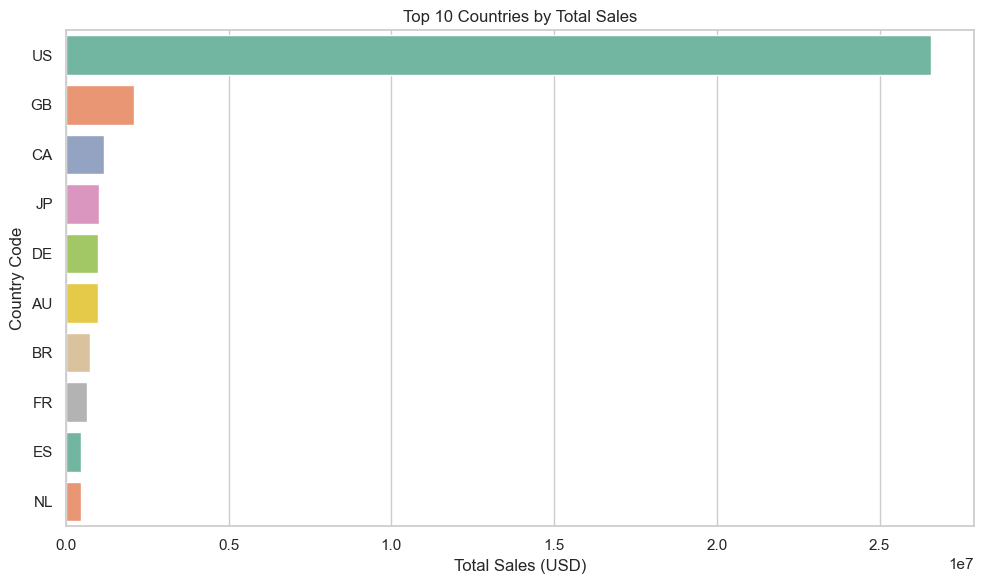

C:\Users\anime\AppData\Local\Temp\ipykernel_23136\230801363.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_aov, x='avg_order_value', y='country_code', palette=colors)


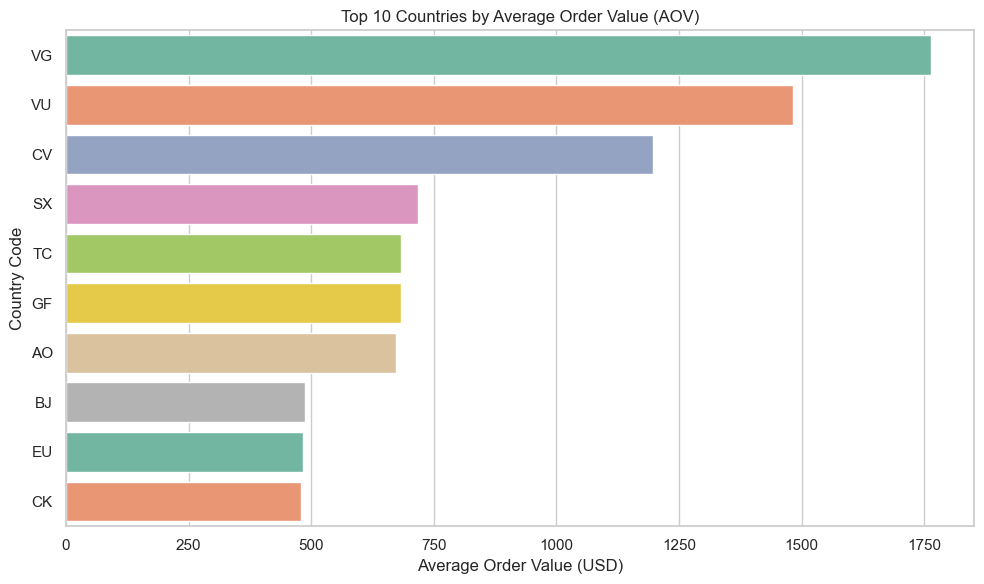

C:\Users\anime\AppData\Local\Temp\ipykernel_23136\230801363.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_orders, x='total_orders', y='country_code', palette=colors)


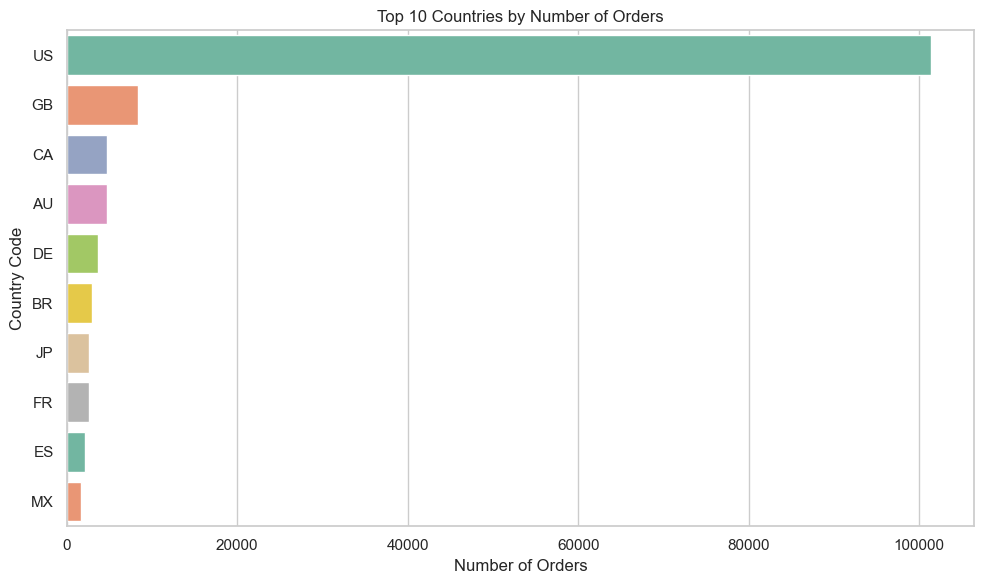

In [261]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by country_code and calculate key metrics
geo_summary = orders_merged.groupby('country_code').agg(
    total_sales=('usd_price', 'sum'),
    total_orders=('order_id', 'count'),
    avg_order_value=('usd_price', 'mean')
).reset_index()

# Sort by total sales for plotting
top_countries = geo_summary.sort_values(by='total_sales', ascending=False).head(10)

# 🎨 Set theme and colors
sns.set_theme(style="whitegrid")
colors = sns.color_palette("Set2", n_colors=10)

# 📊 Bar Chart: Top Countries by Total Sales
plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x='total_sales', y='country_code', palette=colors)
plt.title("Top 10 Countries by Total Sales")
plt.xlabel("Total Sales (USD)")
plt.ylabel("Country Code")
plt.tight_layout()
plt.show()

# 📊 Bar Chart: Top Countries by Average Order Value (AOV)
top_aov = geo_summary.sort_values(by='avg_order_value', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_aov, x='avg_order_value', y='country_code', palette=colors)
plt.title("Top 10 Countries by Average Order Value (AOV)")
plt.xlabel("Average Order Value (USD)")
plt.ylabel("Country Code")
plt.tight_layout()
plt.show()

# 📊 Bar Chart: Top Countries by Number of Orders
top_orders = geo_summary.sort_values(by='total_orders', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_orders, x='total_orders', y='country_code', palette=colors)
plt.title("Top 10 Countries by Number of Orders")
plt.xlabel("Number of Orders")
plt.ylabel("Country Code")
plt.tight_layout()
plt.show()



C:\Users\anime\AppData\Local\Temp\ipykernel_23136\1995834228.py:36: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\anime\AppData\Local\Temp\ipykernel_23136\1995834228.py:36: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\anime\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\anime\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


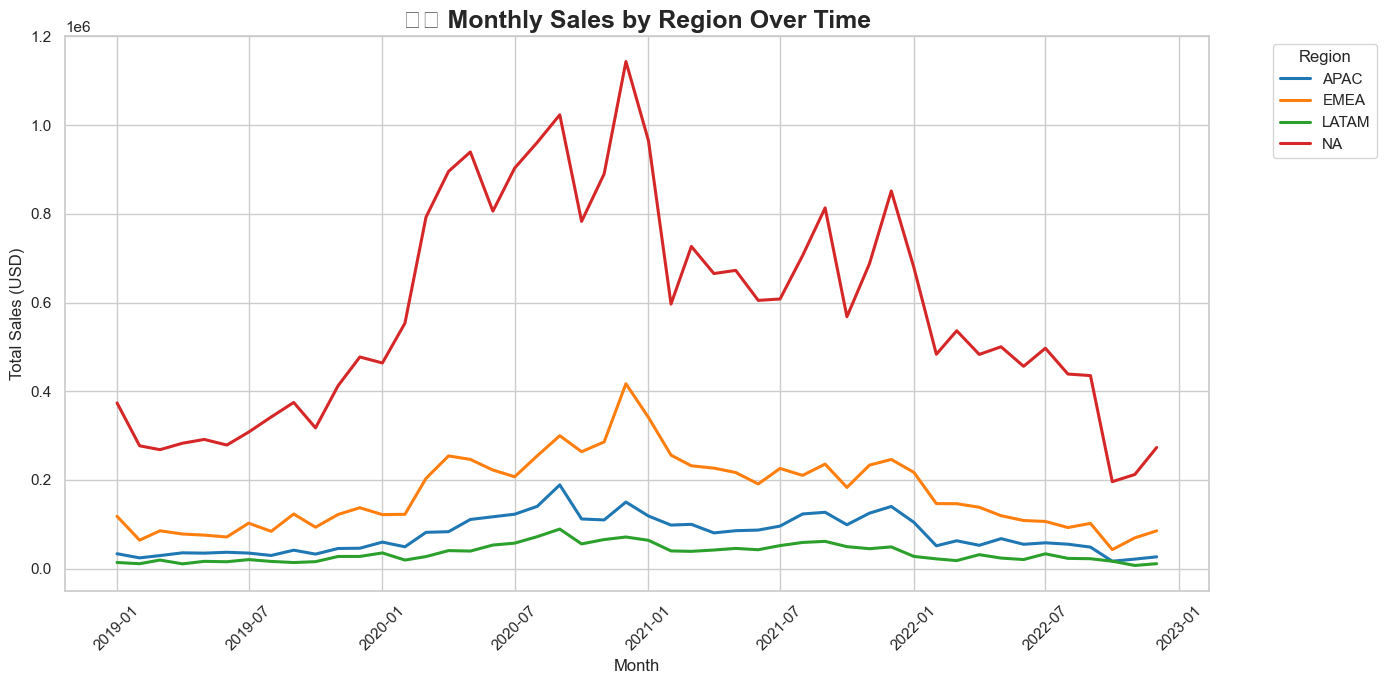

In [273]:
# Filter out rows with missing REGION or purchase_ts
region_sales = orders_merged.dropna(subset=['REGION', 'purchase_ts']).copy()

# Create Year-Month column
region_sales['year_month'] = region_sales['purchase_ts'].dt.to_period('M').astype(str)

# Group by region and year_month
monthly_region_sales = region_sales.groupby(['year_month', 'REGION'])['usd_price'].sum().reset_index()

# Sort by date
monthly_region_sales['year_month'] = pd.to_datetime(monthly_region_sales['year_month'])

# 🎨 Plotting
plt.figure(figsize=(14, 7))
sns.set_theme(style="whitegrid")

# Custom color palette (adjust as needed)
region_palette = sns.color_palette("tab10", n_colors=monthly_region_sales['REGION'].nunique())

# Lineplot
sns.lineplot(
    data=monthly_region_sales,
    x='year_month',
    y='usd_price',
    hue='REGION',
    palette=region_palette,
    linewidth=2.2
)

# Title and labels
plt.title("🗺️ Monthly Sales by Region Over Time", fontsize=18, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [265]:
orders_merged['REGION'].unique()


array(['EMEA', 'LATAM', nan, 'APAC'], dtype=object)

In [267]:
geo.head()

,country_code,REGION
0,AD,EMEA
1,AE,EMEA
2,AG,NaN
3,AI,NaN
4,AL,EMEA


In [269]:
orders_merged[orders_merged['REGION'].isna()]['country_code'].value_counts().head(10)


country_code
US    101362
CA      4783
PR       155
JM        39
TT        27
BS        20
EU        15
GL        13
MQ        12
GP        11
Name: count, dtype: int64

In [271]:
# Define North American country codes
na_codes = ['US', 'CA', 'PR', 'JM', 'TT', 'BS', 'GL', 'MQ', 'GP']

# Assign 'NA' to REGION for those rows
orders_merged.loc[orders_merged['country_code'].isin(na_codes), 'REGION'] = 'NA'


In [279]:
import pandas as pd


# Group by product_name and calculate metrics
product_perf = orders.groupby('product_name').agg(
    total_revenue=('usd_price', 'sum'),
    order_count=('order_id', 'count'),
    refund_count=('refund_ts', lambda x: x.notna().sum()),
    aov=('usd_price', 'mean')
)

# Calculate percentages and rates
product_perf['total_revenue_pct'] = 100 * product_perf['total_revenue'] / product_perf['total_revenue'].sum()
product_perf['order_count_pct'] = 100 * product_perf['order_count'] / product_perf['order_count'].sum()
product_perf['refund_rate'] = 100 * product_perf['refund_count'] / product_perf['order_count']

# Rearranging column order
product_perf = product_perf[[
    'total_revenue', 'total_revenue_pct',
    'aov', 'order_count', 'order_count_pct',
    'refund_rate', 'refund_count'
]]

# Round the numbers for presentation
product_perf = product_perf.round(2)

# Sort by total revenue
product_perf = product_perf.sort_values(by='total_revenue', ascending=False)

# Optional: display top 10
top_products = product_perf.head(10)
print(top_products)


                             total_revenue  total_revenue_pct      aov  \
product_name                                                             
27in 4K gaming monitor          9782863.73              34.80   421.48   
Apple Airpods Headphones        7739617.46              27.53   159.90   
Macbook Air Laptop              6295309.41              22.39  1588.12   
ThinkPad Laptop                 3206316.22              11.41  1099.56   
Samsung Charging Cable Pack      442627.71               1.57    20.20   
Samsung Webcam                   361897.76               1.29    50.43   
Apple iPhone                     213327.59               0.76   740.72   
27in 4k gaming monitor            67880.27               0.24   344.57   
bose soundsport headphones         3339.04               0.01   123.67   

                             order_count  order_count_pct  refund_rate  \
product_name                                                             
27in 4K gaming monitor             23

In [283]:
import pandas as pd
import matplotlib.pyplot as plt




# Step 1: Aggregate performance metrics
product_perf = orders.groupby('product_name').agg(
    total_revenue=('usd_price', 'sum'),
    order_count=('order_id', 'count'),
    refund_count=('refund_ts', lambda x: x.notna().sum()),
    aov=('usd_price', 'mean')
)

# Step 2: Add derived metrics
product_perf['total_revenue_pct'] = 100 * product_perf['total_revenue'] / product_perf['total_revenue'].sum()
product_perf['order_count_pct'] = 100 * product_perf['order_count'] / product_perf['order_count'].sum()
product_perf['refund_rate'] = 100 * product_perf['refund_count'] / product_perf['order_count']

# Step 3: Reorder and format columns
product_perf = product_perf[[
    'total_revenue', 'total_revenue_pct',
    'aov', 'order_count', 'order_count_pct',
    'refund_rate', 'refund_count'
]]

# Step 4: Round for display
product_perf = product_perf.round(2)
product_perf = product_perf.sort_values(by='total_revenue', ascending=False)

# Step 5: Take top 10 for viz
top_products = product_perf.head(10).reset_index()

# Step 6: Format numbers with commas (for better display)
def format_cell(x):
    if isinstance(x, (int, float)):
        return f"{x:,.2f}" if not float(x).is_integer() else f"{int(x):,}"
    return str(x)

formatted_data = [[format_cell(cell) for cell in row] for row in top_products.values]
columns = top_products.columns.tolist()

# Step 7: Create Matplotlib table
# Display a nicely formatted table using Pandas Styler
styled_table = top_products.style.format({
    'total_revenue': "{:,.2f}",
    'total_revenue_pct': "{:.2f}%",
    'aov': "{:,.2f}",
    'order_count': "{:,}",
    'order_count_pct': "{:.2f}%",
    'refund_rate': "{:.2f}%",
    'refund_count': "{:,}"
}).set_properties(**{
    'text-align': 'center'
}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'center')]
}]).background_gradient(cmap='Blues', subset=['total_revenue', 'order_count'])

styled_table


,product_name,total_revenue,total_revenue_pct,aov,order_count,order_count_pct,refund_rate,refund_count
0,27in 4K gaming monitor,"9,782,863.73",34.80%,421.48,"23,211",21.47%,6.16%,"1,429"
1,Apple Airpods Headphones,"7,739,617.46",27.53%,159.90,"48,404",44.78%,5.46%,"2,642"
2,Macbook Air Laptop,"6,295,309.41",22.39%,"1,588.12","3,964",3.67%,11.48%,455
3,ThinkPad Laptop,"3,206,316.22",11.41%,"1,099.56","2,916",2.70%,11.76%,343
4,Samsung Charging Cable Pack,"442,627.71",1.57%,20.20,"21,911",20.27%,1.35%,296
5,Samsung Webcam,"361,897.76",1.29%,50.43,"7,176",6.64%,2.62%,188
6,Apple iPhone,"213,327.59",0.76%,740.72,288,0.27%,7.64%,22
7,27in 4k gaming monitor,"67,880.27",0.24%,344.57,197,0.18%,7.61%,15
8,bose soundsport headphones,"3,339.04",0.01%,123.67,27,0.02%,0.00%,0


###  Loyalty Program Analysis

---

####  Contents:

-  Revenue by Loyalty Status  
  Bar chart comparing total revenue from loyalty vs. non-loyalty customers  
  Uses `usd_price` aggregated by `loyalty_program`

-  Average Order Value (AOV)  
  Bar chart showing mean order value per customer type  
  Based on `usd_price.mean()` grouped by loyalty status

-  Order Count  
  Bar chart comparing number of orders placed by loyalty vs. non-loyalty users  
  Uses `order_id.count()`

-  Refund Rate  
  Bar chart comparing percentage of refunded orders by loyalty status  
  Calculated as `(refunds / total orders) * 100`









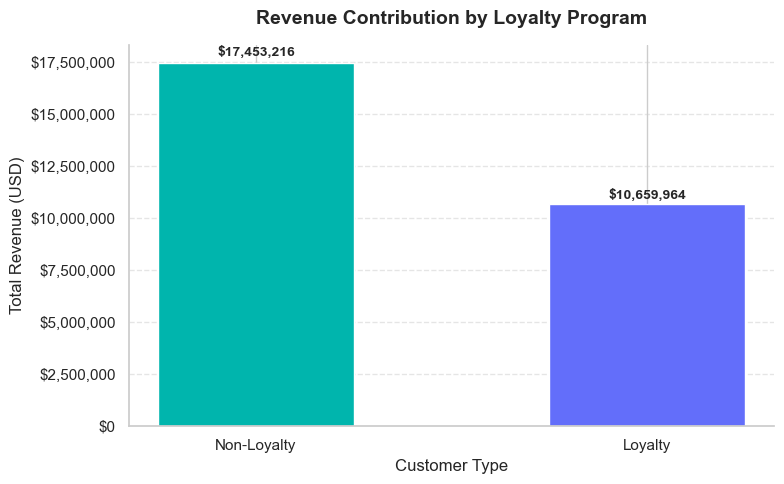

In [295]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


colors = ['#00B5AD', '#636EFA']  # teal + indigo

# Create figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot bars
bars = ax.bar(
    revenue_by_loyalty.index,
    revenue_by_loyalty.values,
    color=colors,
    width=0.5
)

# Title and labels
ax.set_title('Revenue Contribution by Loyalty Program', fontsize=14, weight='bold', pad=15)
ax.set_xlabel('Customer Type', fontsize=12)
ax.set_ylabel('Total Revenue (USD)', fontsize=12)

# Format Y-axis ticks with commas
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Adding grid lines for Y-axis only
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_axisbelow(True)

# Adding value labels above bars
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + (0.01 * height),
        f"${height:,.0f}",
        ha='center', va='bottom',
        fontsize=10, weight='bold'
    )

# Cleaning up frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()

plt.show()


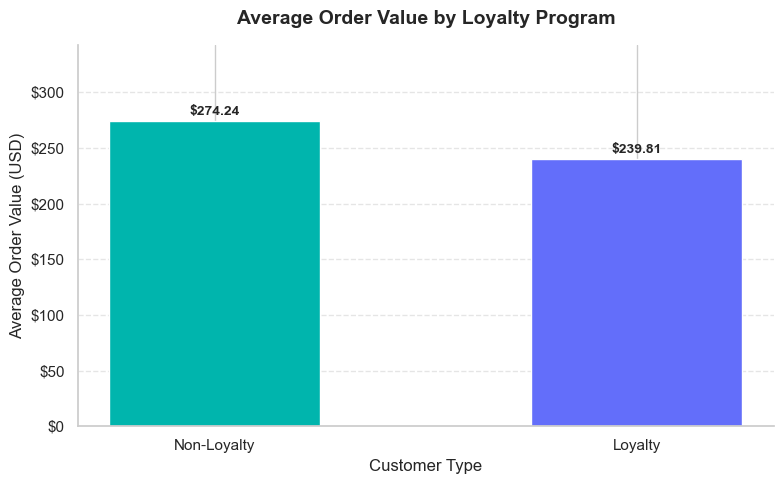

In [299]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# AOV calculation
aov_by_loyalty = orders.groupby('loyalty_program')['usd_price'].mean()
aov_by_loyalty.index = ['Non-Loyalty', 'Loyalty']

# Plot
fig, ax = plt.subplots(figsize=(8, 5))

colors = ['#00B5AD', '#636EFA']

bars = ax.bar(
    aov_by_loyalty.index,
    aov_by_loyalty.values,
    color=colors,
    width=0.5
)

# Title and labels
ax.set_title('Average Order Value by Loyalty Program', fontsize=14, weight='bold', pad=15)
ax.set_xlabel('Customer Type', fontsize=12)
ax.set_ylabel('Average Order Value (USD)', fontsize=12)

# Formatting Y-axis and setting a higher upper limit
max_val = aov_by_loyalty.max()
ax.set_ylim(0, max_val * 1.25)  
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_axisbelow(True)

# Value labels above bars
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + (0.01 * max_val),
        f"${height:,.2f}",
        ha='center', va='bottom',
        fontsize=10, weight='bold'
    )

# Clean up aesthetics
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


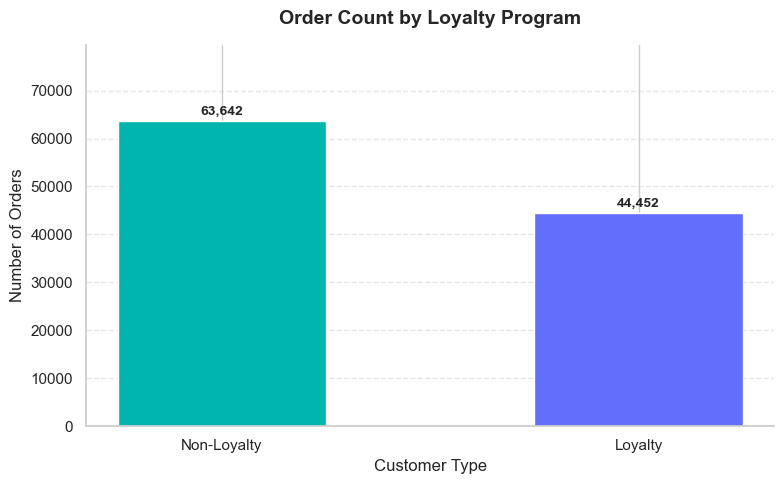

In [301]:
import matplotlib.pyplot as plt

# Order count
order_count = orders.groupby('loyalty_program')['order_id'].count()
order_count.index = ['Non-Loyalty', 'Loyalty']

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
colors = ['#00B5AD', '#636EFA']

bars = ax.bar(order_count.index, order_count.values, color=colors, width=0.5)

# Title & labels
ax.set_title('Order Count by Loyalty Program', fontsize=14, weight='bold', pad=15)
ax.set_xlabel('Customer Type', fontsize=12)
ax.set_ylabel('Number of Orders', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_axisbelow(True)

# Add count labels
max_val = order_count.max()
ax.set_ylim(0, max_val * 1.25)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + (0.01 * max_val),
            f"{int(height):,}", ha='center', va='bottom', fontsize=10, weight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


C:\Users\anime\AppData\Local\Temp\ipykernel_23136\3775526712.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  refund_rate = orders.groupby('loyalty_program').apply(


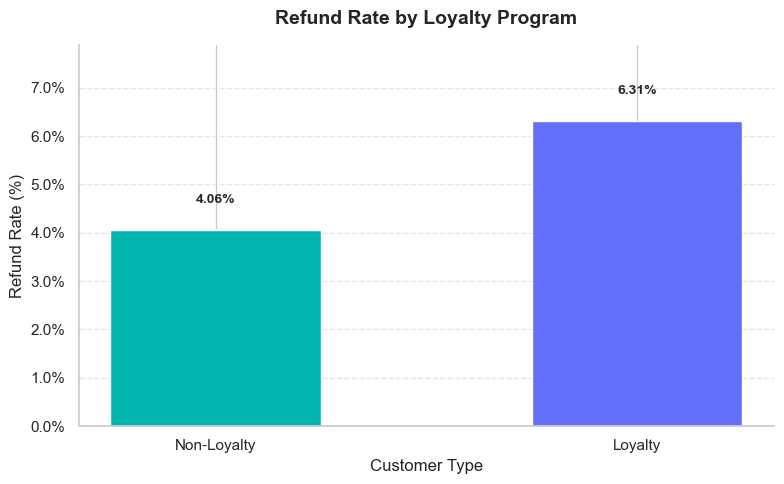

In [303]:
import matplotlib.ticker as mtick

# Refund rate calculation
refund_rate = orders.groupby('loyalty_program').apply(
    lambda x: x['refund_ts'].notna().sum() / x.shape[0] * 100
)
refund_rate.index = ['Non-Loyalty', 'Loyalty']

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(refund_rate.index, refund_rate.values, color=colors, width=0.5)

# Title & labels
ax.set_title('Refund Rate by Loyalty Program', fontsize=14, weight='bold', pad=15)
ax.set_xlabel('Customer Type', fontsize=12)
ax.set_ylabel('Refund Rate (%)', fontsize=12)
ax.set_ylim(0, refund_rate.max() * 1.25)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Grid and labels
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_axisbelow(True)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5,
            f"{height:.2f}%", ha='center', va='bottom', fontsize=10, weight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()
